### 자기회귀(AR, Autoregressive Model)

- 현 시점의 자료가 p시점 전의 유한개의 과거 자료로 설명 될 수 있다.
- 과거의 데이터가 미래 데이터에 영향을 준다고 가정하는 모델이다.
- 현 시점의 시계열 자료에서 몇 번째 전 자료까지 영향을 주는 가를 파악하는데에 사용된다.
- 현재 시점의 데이터가 직전 시점의 데이터에만 영향을 받는 모델을 1차 자기회귀 모형이라 하고, AR(1)로 표기한다.
- 이를 알아내기 위해서는 데이터의 패턴을 분석해야하고, 이때 ACF, PACF를 사용한다.
- 표준 정규분포 영역 내에 들어가는 첫 번째 지점을 절단점이라고 하며, 절단점에서 1을 빼준 값이 AR모델의 차수이다.

> 1. ACF <br>
> 만약 자기회귀 모델이라면,<br>
> 현재 데이터와 멀리 떨어진 과거 데이터의 영향력은 점점 줄어들기 문에 시간이 지남에 따라 상관관계가 줄어든다.

> 2. PACF<br>
> 만약 자기회귀 모델이라면,<br>
> 특정 시점 이후 급격히 감소하는 모양이 나타난다.

- 즉, 자기 회귀 모델이라면, ACF는 시차가 증가함에 따라 점차 감소하고, PACF는 특정 시점 이후 급격히 감소하여 절단된 형태를 보인다.
- 자기회귀 모델을 식별함으로써 데이터의 기본 패턴과 구조를 이해할 수 있고,<br>
  이를 통해 데이터가 어떻게 변동하는지, 과거 데이터가 미래에 어떤 영향을 미치는지에 대한 통찰력을 제공한다.

### 이동평균(MA, Moving Average)

- 일정 기간 동안의 데이터를 평균하여 시계열 데이터의 부드러운 패턴을 확인할 수 있게 해준다.
- 특정 기간 동안의 데이터를 평균한 값으로, 시계열 데이터의 일정기간 동안의 평균을 보여준다.
- 데이터의 변동을 부드럽게 만들어서 패턴을 파악하는 데 도움이 되며, 시열 데이터의 추세를 이해하고 예측하는 데에 유용한 도구이다.

<img src='./images/ma.jpg' width=900px>

### 안정 시계열(ARMA)

- 과거의 데이터와 최근의 평균을 사용하여 시계열 데이터의 패턴을 파악하고 예측하는 데에 사용한다.
- 2022년 3월을 기준으로  ARMA가 중단되고 ARIMA로 대체되었다.
- ARMA 모델은 시계열 데이터의 과거 값을 기반으로 한 선형예측 모델이기 떄문에 <br>
  시계열 데이터가 정상성을 보이고, 예측에 영향을 주는 외부요인이 없는 등의 가정을 만족해야한다.
- 비 정상성 데이터나 비 선형적인 패턴을 갖는 데이터의 경우 패턴 파악 및 예측이 어렵다.
- ARMA(1,0) = AR(1)
- ARMA(0,1) = MA(1)
- ARMA(1,1) = AR(1), MA(1)

### 불안정 시계열(ARIMA)
- ARIMA(p,d,q): d차로 차분한 데이터의 AR(p)모형과 MA(q)모형을 합친 모델이다.
- AutoRegressive, Integrated(누적 차분), Moving Average의 세 요소로 구성되어 있다.
- I는 비정상 시계열을 정상 시계열로 만들기 위해서 필요한 차분횟수를 의미한다.

In [1]:
import yfinance as yf

google_stock_df = yf.download('GOOG', start='2014-05-01')
google_stock_df = google_stock_df['Adj Close']
google_stock_df

[*********************100%%**********************]  1 of 1 completed


Date
2014-05-01     26.464643
2014-05-02     26.294304
2014-05-05     26.288328
2014-05-06     25.657280
2014-05-07     25.399282
                 ...    
2024-06-04    174.930939
2024-06-05    176.868744
2024-06-06    178.147278
2024-06-07    175.750000
2024-06-10    176.630005
Name: Adj Close, Length: 2545, dtype: float64

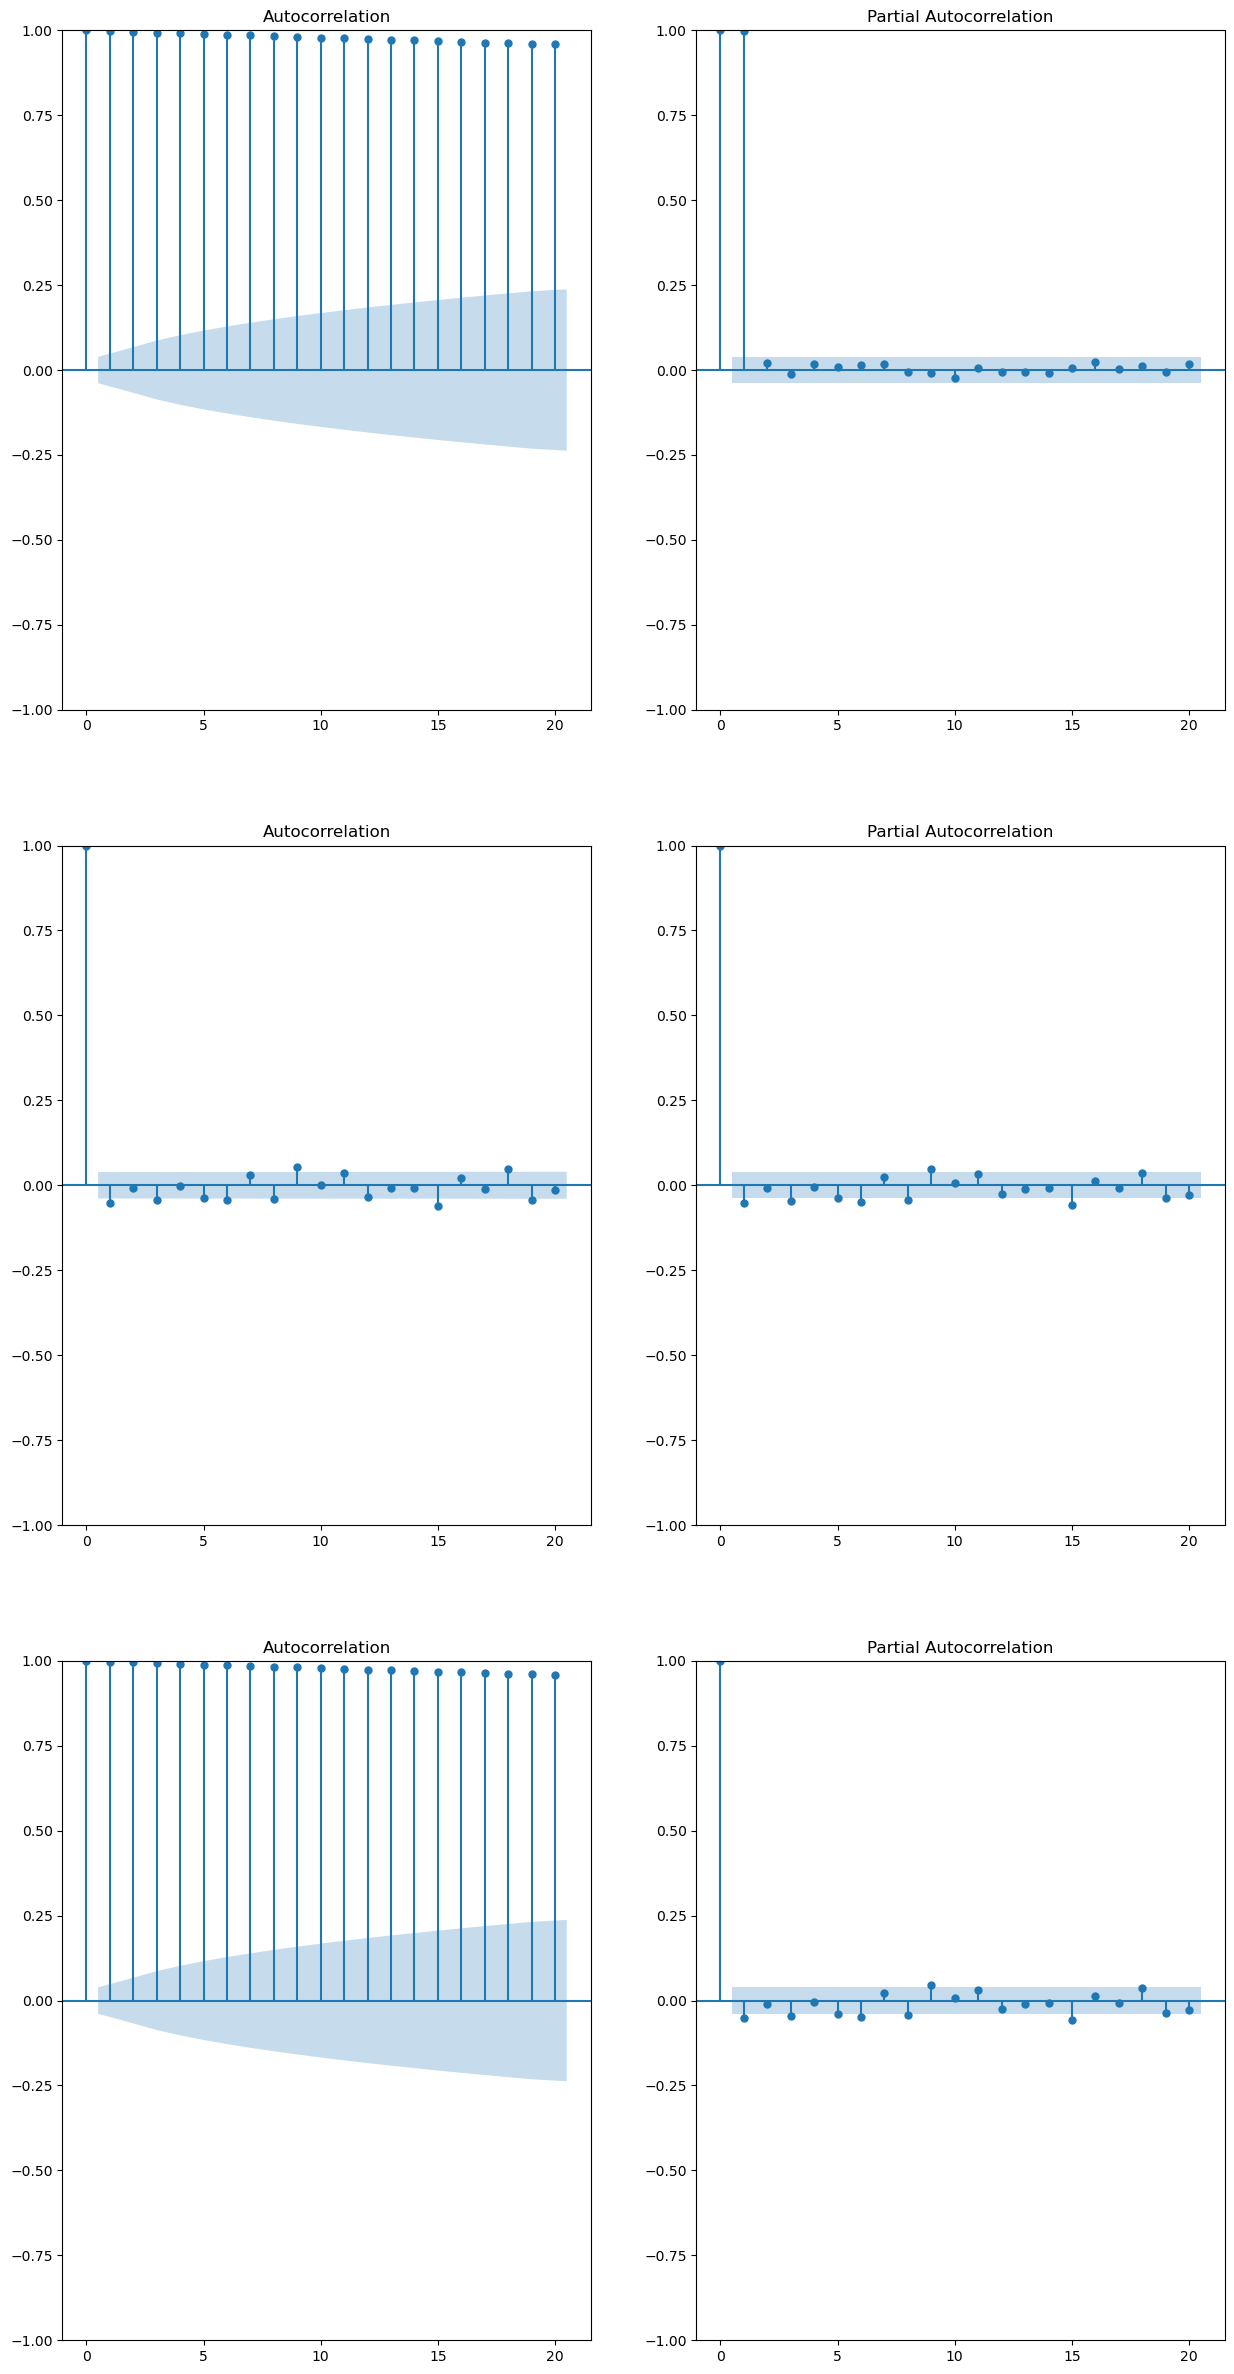

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


fig, ax = plt.subplots(3, 2, figsize=(15, 30))

plot_acf(google_stock_df, lags=20, ax=ax[0][0])
plot_pacf(google_stock_df, lags=20, ax=ax[0][1])

plot_acf(google_stock_df.diff().dropna(), lags=20, ax=ax[1][0])
plot_pacf(google_stock_df.diff().dropna(), lags=20, ax=ax[1][1])

plot_acf(google_stock_df, lags=20, ax=ax[2][0])
plot_pacf(google_stock_df.diff().dropna(), lags=20, ax=ax[2][1])

plt.show()

In [3]:
import yfinance as yf

google_stock_df = yf.download('GOOG', start='2014-05-01')
google_stock_df = google_stock_df['Adj Close']
google_stock_df

[*********************100%%**********************]  1 of 1 completed


Date
2014-05-01     26.464643
2014-05-02     26.294304
2014-05-05     26.288328
2014-05-06     25.657280
2014-05-07     25.399282
                 ...    
2024-06-04    174.930939
2024-06-05    176.868744
2024-06-06    178.147278
2024-06-07    175.750000
2024-06-10    176.630005
Name: Adj Close, Length: 2545, dtype: float64

In [4]:
google_stock_diff_df = google_stock_df.diff()
google_stock_diff_df.dropna(inplace=True)
google_stock_diff_df

Date
2014-05-02   -0.170340
2014-05-05   -0.005976
2014-05-06   -0.631048
2014-05-07   -0.257998
2014-05-08    0.051800
                ...   
2024-06-04    0.709198
2024-06-05    1.937805
2024-06-06    1.278534
2024-06-07   -2.397278
2024-06-10    0.880005
Name: Adj Close, Length: 2544, dtype: float64

In [5]:
window_size = 20

moving_avg = google_stock_df.rolling(window_size).mean()
print(moving_avg)

moving_avg_diff = google_stock_diff_df.rolling(window_size).mean()
print(moving_avg_diff)

Date
2014-05-01           NaN
2014-05-02           NaN
2014-05-05           NaN
2014-05-06           NaN
2014-05-07           NaN
                 ...    
2024-06-04    174.567348
2024-06-05    174.771617
2024-06-06    175.130708
2024-06-07    175.348959
2024-06-10    175.675638
Name: Adj Close, Length: 2545, dtype: float64
Date
2014-05-02         NaN
2014-05-05         NaN
2014-05-06         NaN
2014-05-07         NaN
2014-05-08         NaN
                ...   
2024-06-04    0.264699
2024-06-05    0.204269
2024-06-06    0.359091
2024-06-07    0.218251
2024-06-10    0.326678
Name: Adj Close, Length: 2544, dtype: float64


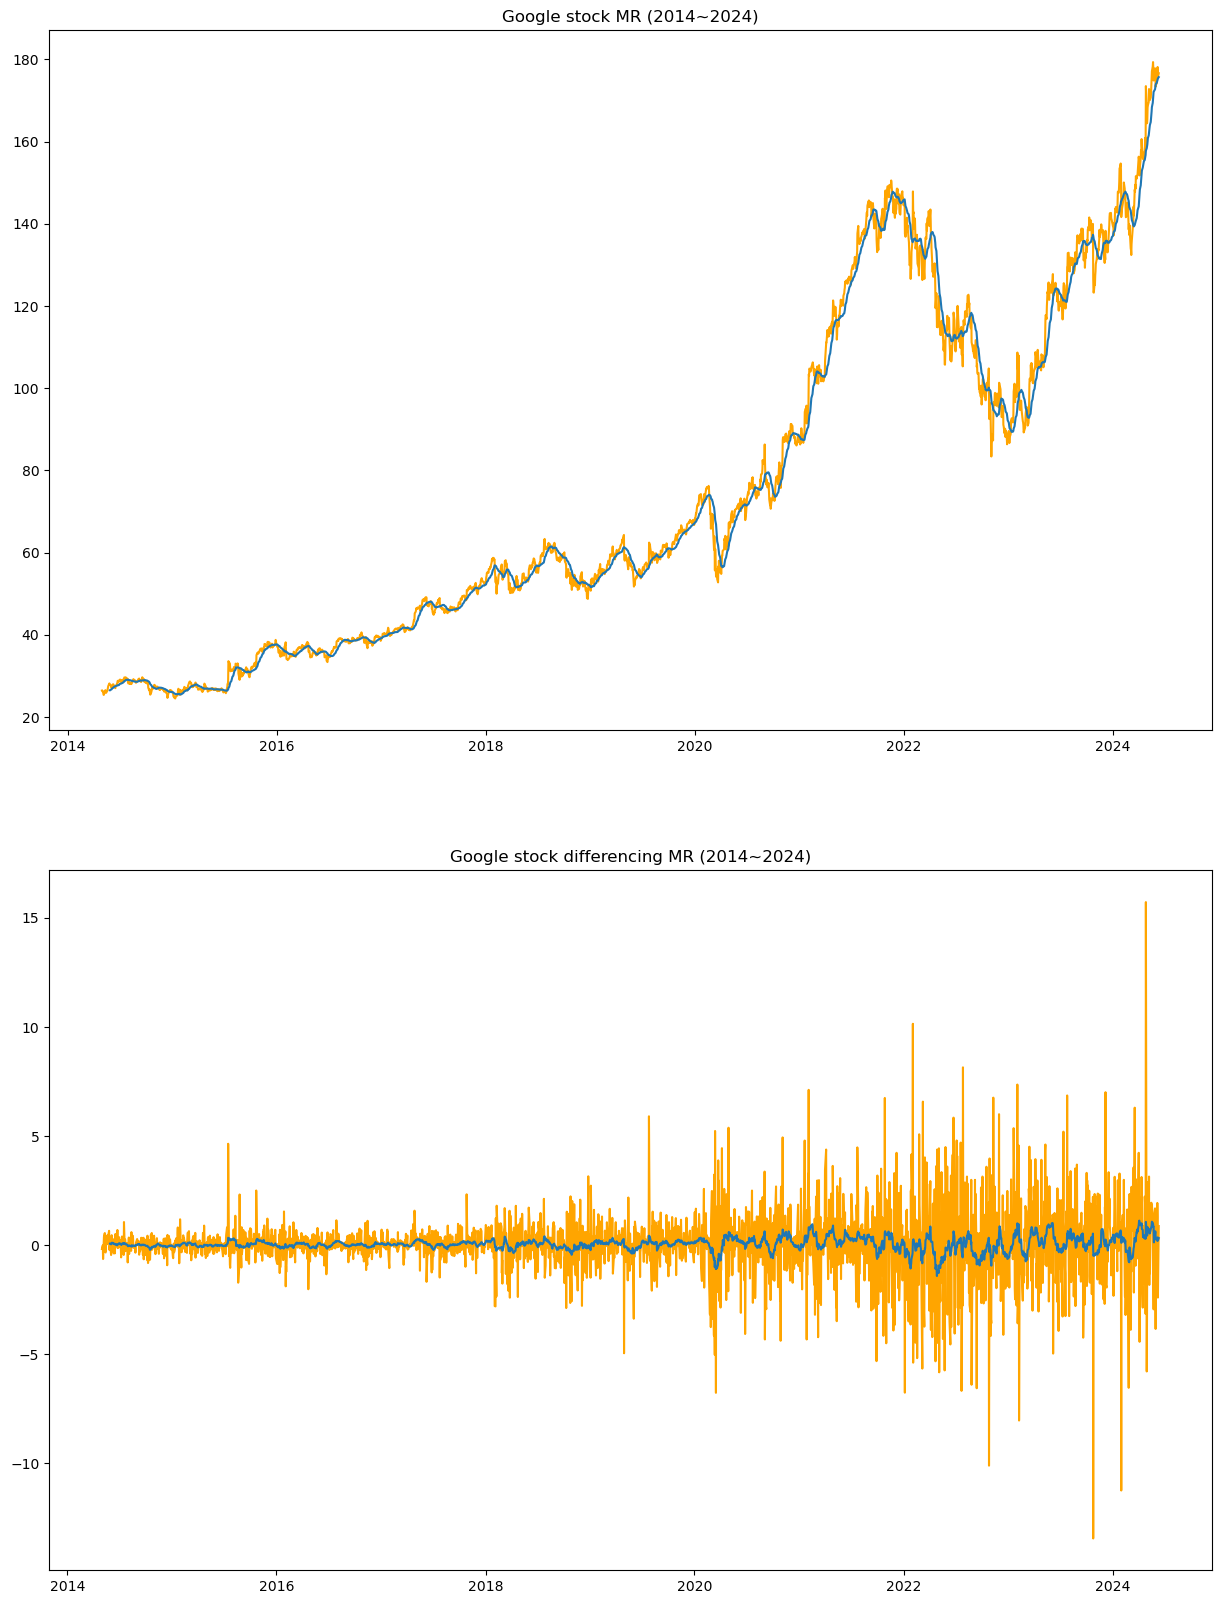

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

plt.subplot(2, 1, 1)
plt.plot(google_stock_df, c='orange')

plt.subplot(2, 1, 1)
plt.plot(moving_avg)

plt.title('Google stock MR (2014~2024)')

plt.subplot(2, 1, 2)
plt.plot(google_stock_diff_df, c='orange')

plt.subplot(2, 1, 2)
plt.plot(moving_avg_diff)

plt.title('Google stock differencing MR (2014~2024)')

plt.show()

#### ARIMA

In [7]:
google_stock_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2545 entries, 2014-05-01 to 2024-06-10
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
2545 non-null   float64
dtypes: float64(1)
memory usage: 39.8 KB


In [8]:
# import pandas as pd
# # 인덱스를 날짜 타입으로 바꾸는 방법
# google_stock_df = google_stock_df.reindex(pd.date_range(google_stock_df.index[0], google_stock_df.index[-1]))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


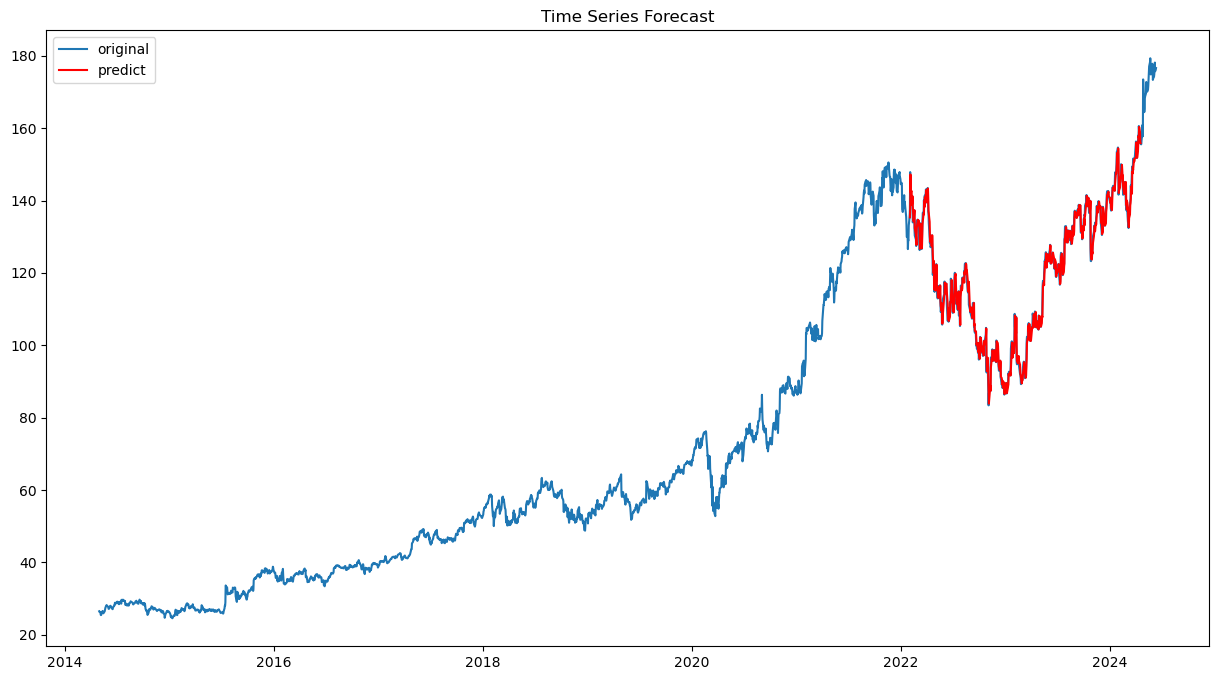

In [15]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(google_stock_df, order=(1,1,1))
model_fit = model.fit()

start_index = pd.to_datetime('2022-02-01')
end_index = pd.to_datetime('2024-04-17')
forecast = model_fit.predict(start = start_index, end = end_index)

plt.figure(figsize =(15,8))
plt.plot(google_stock_df,label='original')
plt.plot(forecast,label='predict',c='red')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

mse = mean_squared_error(google_stock_df['2022-02-01':'2024-04-17'], forecast)
print('Mean Squared Error', mse)


msle = mean_squared_log_error(google_stock_df['2022-02-01':'2024-04-17'], forecast)
print('Mean Squared Error', msle)

Mean Squared Error 6.374713751265443
Mean Squared Error 0.0004560143128435596
